In [1]:
# basic
import math
import numpy as np 
import pandas as pd 
import datetime as dt 
from pandas_datareader import data as pdr 


# matplotlib
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates


In [11]:
class US_Treasury_Note():

    def __init__(self,start,end):
        self.start = start 
        self.end = end 
    
    def get_prcie_df(self,maturity,plot) :

        if maturity == 10 :
            ticker = "^TNX"
        elif maturity == 30 :
            ticker = "^TYX"
        elif maturity == 5 :
            ticker = "^FVX"
        elif maturity == "13 weeks" :
            ticker = "^IRX"
        
        self.df = pdr.get_data_yahoo(ticker,self.start,self.end)

        if plot == True :

            plot_df = self.df.tail(360)
            fig,ax = plt.subplots(figsize=(23,6))
            plt.title(str(maturity)+" yield Rate")
            plt.plot(plot_df.index,plot_df['Close'])
            for i in range(plot_df.shape[0]):

                if i % 100 == 0:
                    plt.annotate(str(np.round(plot_df['Close'][i],decimals=2))+"%",xy=(plot_df.index[i],plot_df['Close'][i]))
                    plt.scatter(plot_df.index[i],plot_df['Close'][i],marker="*",color='red')
                    plt.annotate("("+str(plot_df.index[i])[:10]+")",xy=(plot_df.index[i],float(plot_df['Close'][i])*(9/10)),color='red')

            plt.annotate(str(np.round(plot_df['Close'][-1],decimals=2))+"%",xy=(plot_df.index[-1],plot_df['Close'][-1]))
            plt.scatter(plot_df.index[-1],plot_df['Close'][-1],marker="*",color='red')
            plt.annotate("("+str(plot_df.index[-1])[:10]+")",xy=(plot_df.index[-1],float(plot_df['Close'][-1])*(9/10)),color='red')


            plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=40))
            plt.gcf().autofmt_xdate()
            plt.grid()
            plt.show()

            return self.df

        
        return self.df
    
    def price_data(self):
        return self.df['Close'].values
    
    def current_yield_curve(self,plot=None):
        
        df_30 = pdr.get_data_yahoo("^TYX",self.start,dt.datetime.now() )['Close'].values[-1]
        df_10 = pdr.get_data_yahoo("^TNX",self.start,dt.datetime.now() )['Close'].values[-1]
        df_5  = pdr.get_data_yahoo("^FVX",self.start,dt.datetime.now() )['Close'].values[-1]
        df_short = pdr.get_data_yahoo("^IRX",self.start,dt.datetime.now())['Close'].values[-1]

        yield_value = [df_short,df_5,df_10,df_30]
        x_index = ["13-weeks","5-year","10-year","30-year"]

        if plot==True :
            
            fig,ax = plt.subplots(figsize=(23,6))
            ax.plot(x_index,yield_value,label='T-Bill Rates')
            plt.title("Yield Curve")
            ax.scatter(x_index,yield_value,marker='o',color='r')
            plt.ylabel("current yield")
            plt.xlabel("time")
            plt.grid()
            plt.legend()
            plt.show()

            return yield_value , fig
        
        return yield_value


    
    def history_yield_spread(self,plot=None):

        df_10 = pdr.get_data_yahoo("^TNX",self.start,self.end)['Close']
        df_short = pdr.get_data_yahoo("^IRX",self.start,self.end)['Close']

        self.yield_spread = df_10 - df_short

        if plot==True :
            
            fig,ax = plt.subplots(figsize=(23,6))
            plt.title("History Yield Spread")
            ax.plot(self.yield_spread,label='Spread ( 10 years - 13 weeks )')
            plt.axhline(0,color="r")
            plt.ylabel("spread(%)")
            plt.xlabel("time")
            plt.legend()
            plt.grid()
            plt.show()

            return self.yield_spread , fig
        


        return self.yield_spread

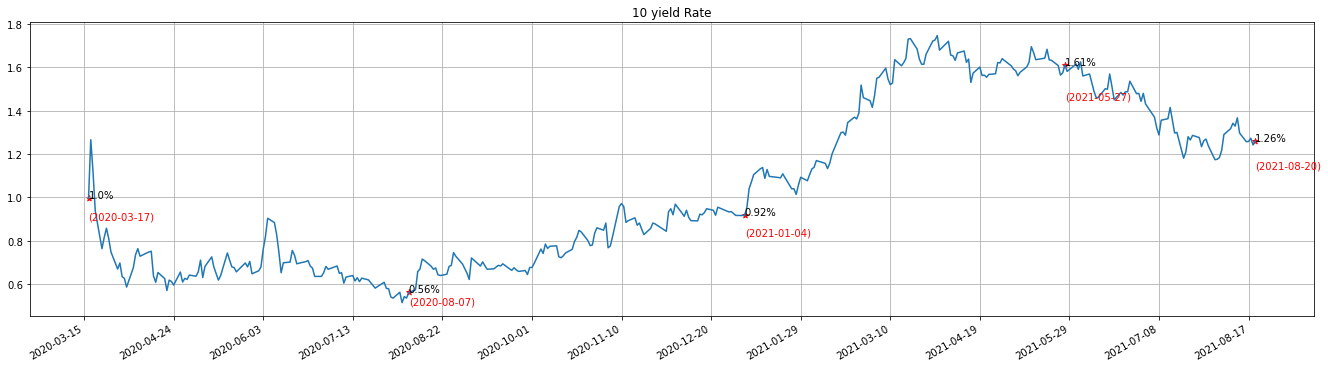

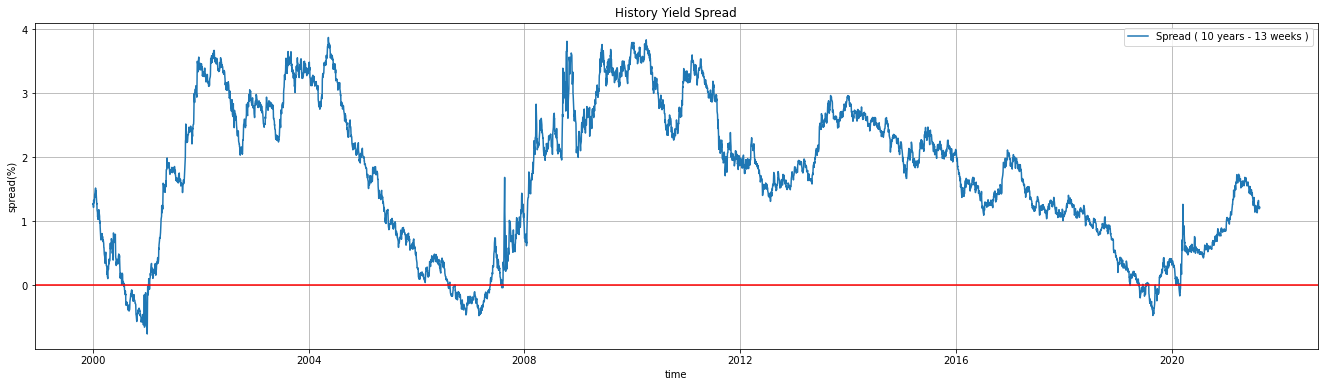

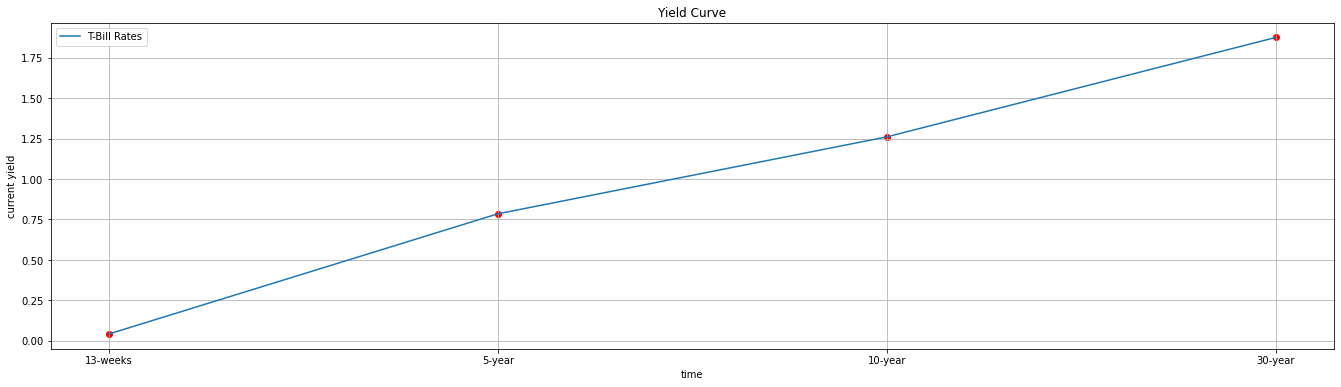

In [12]:
US_Treasury = US_Treasury_Note(start=dt.datetime(2000,1,1),end=dt.datetime.now())
US_10_df = US_Treasury.get_prcie_df(maturity=10,plot=True)

yield_spread,_ = US_Treasury.history_yield_spread(plot=True)
yield_cureve,_ = US_Treasury.current_yield_curve(plot=True)


In [13]:
class US_Market():

    """
    Major Market Index --> SPY(^GSPC) , DWJ
    """

    def __init__(self,start,end):
        self.start = start 
        self.end = end 
    
    def get_prcie_df(self,ticker,plot):


        self.df = pdr.get_data_yahoo(ticker,self.start,self.end)

        if plot == True :

            plot_df = self.df.tail(360)
            fig,ax = plt.subplots(figsize=(23,6))
            plt.title(str(ticker)+" Price Data")
            plt.plot(plot_df.index,plot_df['Close'])
            for i in range(plot_df.shape[0]):

                if i % 100 == 0:
                    plt.annotate(str(np.round(plot_df['Close'][i],decimals=2)),xy=(plot_df.index[i],plot_df['Close'][i]))
                    plt.scatter(plot_df.index[i],plot_df['Close'][i],marker="*",color='red')
                    plt.annotate("("+str(plot_df.index[i])[:10]+")",xy=(plot_df.index[i],float(plot_df['Close'][i])*(19/20)),color='red')
            
            plt.annotate(str(np.round(plot_df['Close'][-1],decimals=2)),xy=(plot_df.index[-1],plot_df['Close'][-1]))
            plt.scatter(plot_df.index[-1],plot_df['Close'][-1],marker="*",color='red')
            plt.annotate("("+str(plot_df.index[-1])[:10]+")",xy=(plot_df.index[-1],float(plot_df['Close'][-1])*(19/20)),color='red')

            plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=40))
            plt.gcf().autofmt_xdate()
            plt.grid()
            plt.show()

            return self.df


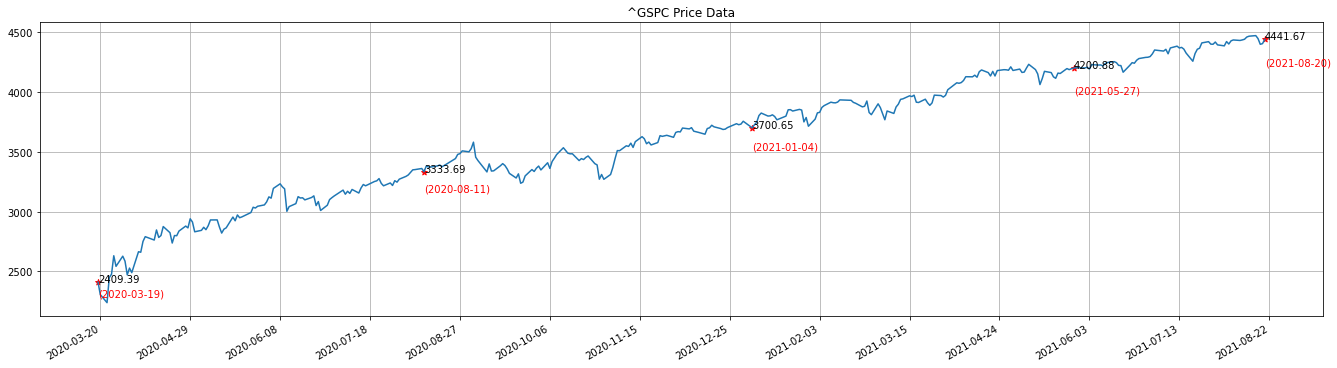

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,1472.420044,1458.189941,1464.469971,1469.250000,374050000,1469.250000
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
...,...,...,...,...,...,...
2021-08-16,4480.259766,4437.660156,4461.649902,4472.939941,2707170000,4472.939941
2021-08-17,4462.120117,4417.830078,4462.120117,4448.080078,2884000000,4448.080078
2021-08-18,4454.319824,4397.589844,4440.939941,4400.270020,2965210000,4400.270020


In [14]:
US_Market_Data = US_Market(start=dt.datetime(2000,1,1),end=dt.datetime.now())
US_SP500 = US_Market_Data.get_prcie_df(ticker='^GSPC',plot=True)
US_SP500 
